##### Bellevue University
## DSC680 - Summer 2022
### Madhukar Ayachit
### Week 5- 7


In [1]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 300)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

In [27]:
#!pip install textblob      #for installation


In [69]:
#Importing YouTube comments data
#data = pd.read_csv('../input/glassdoorreviews.csv',encoding='utf8',error_bad_lines=False);#opening the file UScomments
data = pd.read_csv('data/Employee-review.csv',encoding = 'unicode_escape');#opening the file UScomments

In [72]:
data.columns

Index(['employID', 'rating', 'reviewDate', 'reviewHeadLine', 'authorLocation',
       'autherJobTitle', 'pros', 'cons', 'subRatings', 'authorReviewLink',
       'reviewDateIST', 'dayOfWeek', 'month', 'dayOfMonth', 'year', 'peher'],
      dtype='object')

In [4]:
data.head()

,employID,rating,reviewDate,reviewHeadLine,authorLocation,autherJobTitle,pros,cons,subRatings,authorReviewLink,reviewDateIST,dayOfWeek,month,dayOfMonth,year,peher
0,empReview_37129090,5,Wed Oct 14 2020 07:31:37 GMT-0700 (Pacific Daylight Time),"""Good place to work and learn""",Bangalore,Former Employee - Anonymous Employee,Good place to work and learn,less exposure to new technologies,NaN,/Reviews/Employee-Review-Tata-Consultancy-Services-RVW37129090.htm,Wed Oct 14 2020 20:01:37,Wed,Oct,14,2020,Evening
1,empReview_36887091,5,Thu Oct 08 2020 07:36:36 GMT-0700 (Pacific Daylight Time),"""Always Great..""",Bangalore,Current Employee - Tibco Developer/Software Engineer,"1.Best company for settling in life\n2.Very much employee friendly\n3.Great mediclaim policy\n4.Unlimited learning opportunities like fresco play,ievolve and access to Udemy.\n5.Scholarship for Higher studies for eligible candidates.\n6.Fair amount of leaves and leave without pay.For women 6 mon...","1.Always try to join after gaining some experiance.Salary for freshers is very less and can't imagine of reaching a decent CTC with annual band or increments.\n2.Once you resign company,can't come back.So literally for all freshers,opt TCS once you gain some experience.Its really great.","{'Work/Life Balance': '4.0', 'Culture & Values': '5.0', 'Diversity & Inclusion': '5.0', 'Career Opportunities': '4.0', 'Compensation and Benefits': '4.0', 'Senior Management': '4.0'}",/Reviews/Employee-Review-Tata-Consultancy-Services-RVW36887091.htm,Thu Oct 08 2020 20:06:36,Thu,Oct,8,2020,Evening
2,empReview_37120523,5,Wed Oct 14 2020 03:21:22 GMT-0700 (Pacific Daylight Time),"""Very Very good for fresher""",Mumbai,Current Employee - SoftwareDeveloper,TCS provide job security even in a pandemic situation,no cons for TCS it is best,"{'Work/Life Balance': '5.0', 'Culture & Values': '5.0', 'Diversity & Inclusion': '5.0', 'Career Opportunities': '5.0', 'Compensation and Benefits': '5.0', 'Senior Management': '5.0'}",/Reviews/Employee-Review-Tata-Consultancy-Services-RVW37120523.htm,Wed Oct 14 2020 15:51:22,Wed,Oct,14,2020,Afternoon
3,empReview_37124016,5,Wed Oct 14 2020 05:26:40 GMT-0700 (Pacific Daylight Time),"""Very good""",NaN,Current Employee - Systems Engineer,"Job security , work life balance",Not any negatives as such,"{'Work/Life Balance': '5.0', 'Culture & Values': '5.0', 'Diversity & Inclusion': '5.0', 'Career Opportunities': '5.0', 'Compensation and Benefits': '5.0', 'Senior Management': '5.0'}",/Reviews/Employee-Review-Tata-Consultancy-Services-RVW37124016.htm,Wed Oct 14 2020 17:56:40,Wed,Oct,14,2020,Evening
4,empReview_37127287,5,Wed Oct 14 2020 06:47:29 GMT-0700 (Pacific Daylight Time),"""Great Place to work""",NaN,Current Employee - Systems Engineer,There are many opportunities to learn,Nothing as such for now.,{'Career Opportunities': '5.0'},/Reviews/Employee-Review-Tata-Consultancy-Services-RVW37127287.htm,Wed Oct 14 2020 19:17:29,Wed,Oct,14,2020,Evening


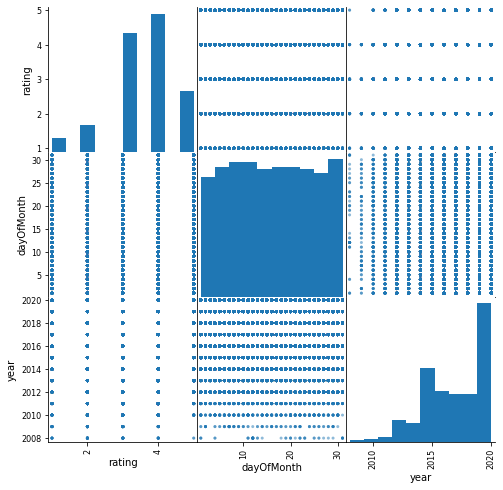

In [67]:
import seaborn as sns
from pandas.plotting import scatter_matrix
sm = scatter_matrix(data[['rating', 'dayOfMonth', 'year']], figsize = (8, 8))
sns.despine()

In [5]:
#import nltk
#nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/madhukarayachit/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [73]:
df = pd.DataFrame()

In [74]:
df['reviewHeadLine']=data['reviewHeadLine']
df['reviewText']=data['pros'] + data["cons"]
df['author']=data['authorLocation']
df['jobTitle']=data['autherJobTitle']
df['length']=df['reviewText'].str.len()

In [75]:
# Text cleanup
import re
import string

def clean_text(text:str):
    """ Return cleaned text:
            - lowercase
            - remove whitespaces
            - remove HTML tags
            - replace digit with spaces
            - replace punctuations with spaces
            - remove extra spaces and tabs
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    #text = str(text)
    
    text = text.lower()
    text = text.strip()
    
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    
    text = text.strip()
    
    return text

In [76]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def remove_stopwords(text:str):
    """ Remove stopwords from text:
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    #text = str(text)
    filtered_sentence = []

    # getting all english stopwords 
    stop_words = set(stopwords.words('english'))
    stop_words
    
    # Stop word lists can be adjusted for your problem
    ##stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    
    return text

In [77]:
from nltk.stem import SnowballStemmer
def stemm_text(text:str):
    """ Stemm text:
    ------
    input: text (str)    
    output: Stemmed text (str)
    """
    #text = str(text)
    # Initialize the stemmer
    snow = SnowballStemmer('english')

    stemmed_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        # Stem the word/token
        stemmed_sentence.append(snow.stem(w))
    text = " ".join(stemmed_sentence)
    
    return text

In [78]:
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
from nltk.corpus import wordnet

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [79]:
from nltk.stem import WordNetLemmatizer
def lemmatize(text:str):
    """ lemmatize text:
    ------
    input: text (str)    
    output: lemmatized text (str)
    """
    #text = str(text)
    
    # Initialize the lemmatizer
    wl = WordNetLemmatizer()

    lemmatized_sentence = []

    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)
    
    return lemmatized_text

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/madhukarayachit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/madhukarayachit/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/madhukarayachit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [80]:
# clean text
df['reviewText']=  df['reviewText'].apply(clean_text)
# remove stopwordsTe
df['reviewText']=  df['reviewText'].apply(remove_stopwords)
# lemmatize
df['reviewText']=  df['reviewText'].apply(lemmatize)

In [81]:
from wordcloud import WordCloud

def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [82]:
comm = df

In [83]:
#Calculating the Sentiment Polarity
polarity=[] # list which will contain the polarity of the comments
subjectivity=[] # list which will contain the subjectivity of the comments
for i in comm['reviewText'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

In [84]:
#Adding the Sentiment Polarity column to the data
comm['polarity']=polarity
comm['subjectivity']=subjectivity

In [86]:
comm.head()


,reviewHeadLine,reviewText,author,jobTitle,length,polarity,subjectivity
0,"""Good place to work and learn""",good place work learnless exposure new technology,Bangalore,Former Employee - Anonymous Employee,61,0.418182,0.527273
1,"""Always Great..""",1 best company settle life 2 much employee friendly 3 great mediclaim policy 4 unlimited learn opportunity like fresco play ievolve access udemy 5 scholarship high study eligible candidate 6 fair amount leaf leave without pay woman month materninty leave salary year leave without pay 1 always tr...,Bangalore,Current Employee - Tibco Developer/Software Engineer,645,0.403500,0.467333
2,"""Very Very good for fresher""",tc provide job security even pandemic situationno con tcs best,Mumbai,Current Employee - SoftwareDeveloper,79,1.000000,0.300000
3,"""Very good""",job security work life balancenot negative,NaN,Current Employee - Systems Engineer,57,-0.300000,0.400000
4,"""Great Place to work""",many opportunity learnnothing,NaN,Current Employee - Systems Engineer,61,0.500000,0.500000


In [27]:
#Displaying the POSITIVE comments

comm[['reviewHeadLine','rating','polarity','subjectivity']].head(10)[comm.polarity>0].head(10)

,reviewHeadLine,rating,polarity,subjectivity
0,"""Good place to work and learn""",0.44,0.418182,0.527273
1,"""Always Great..""",0.95,0.403500,0.467333
2,"""Very Very good for fresher""",0.77,1.000000,0.300000
4,"""Great Place to work""",0.38,0.500000,0.500000
5,"""Best Company to work""",0.49,0.400000,0.800000
6,"""Good company""",0.72,0.233333,0.200000
7,"""Very good place to work""",-0.34,0.350000,0.300000
9,"""Good workplace""",0.65,0.700000,0.600000


In [28]:
#Displaying the NEGATIVE comments

comm[['reviewHeadLine','rating','polarity','subjectivity']].head(10)[comm.polarity<0].head(10)

,reviewHeadLine,rating,polarity,subjectivity
3,"""Very good""",0.34,-0.3,0.4


In [29]:
#Displaying highly positive reviews

comm[['reviewHeadLine','rating','polarity','subjectivity']].head(10)[comm.polarity>0.8].head(10)

,reviewHeadLine,rating,polarity,subjectivity
2,"""Very Very good for fresher""",0.77,1.0,0.3


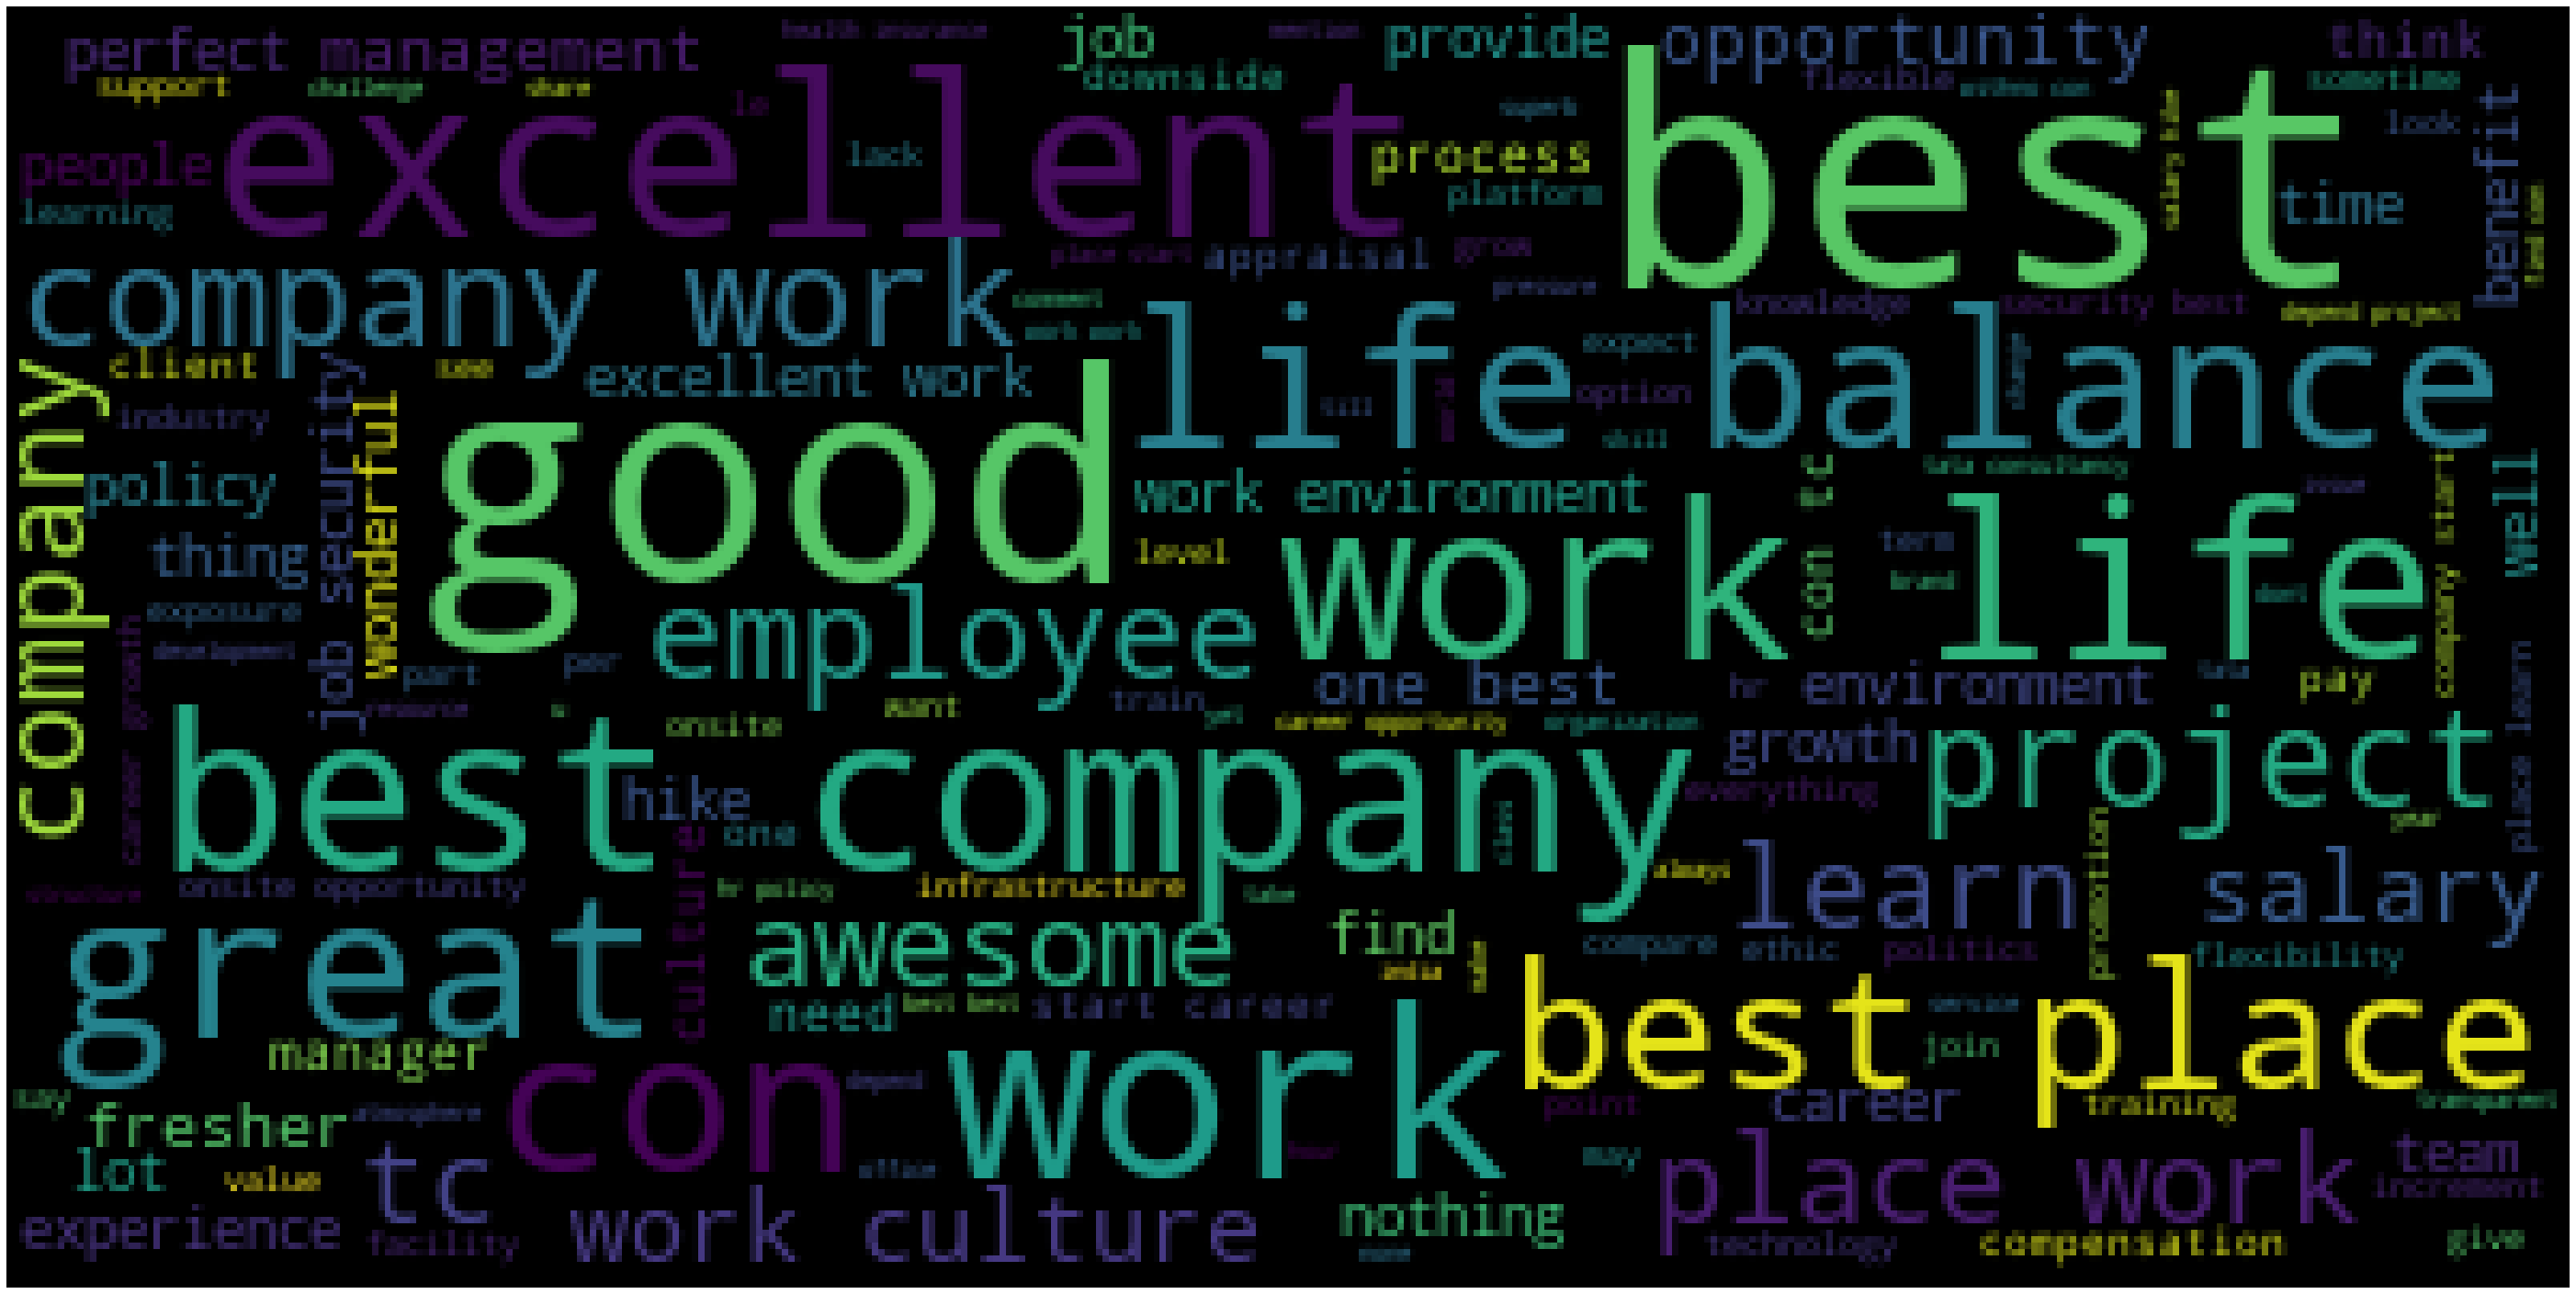

In [30]:
wc(comm['reviewText'][comm.polarity>0.8],'black','Common Words' )

In [31]:
#Displaying highly negative reviews
comm[['reviewHeadLine','rating','polarity','subjectivity']][comm.polarity<-0.25].head(10)

,reviewHeadLine,rating,polarity,subjectivity
3,"""Very good""",0.34,-0.300000,0.400000
57,"""TCS""",0.04,-0.288889,0.411111
59,"""Work culture""",0.38,-0.300000,0.400000
86,"""Good, Learn quickly and move ahead""",0.69,-0.300000,0.400000
92,"""Good place to work""",0.38,-0.300000,0.400000
191,"""safe company but very slow growth rate""",0.62,-0.300000,0.400000
202,"""Good work life balance""",0.00,-0.800000,1.000000
203,"""Great benefits""",0.38,-0.300000,0.400000
229,"""Best company for Freshers""",0.68,-0.300000,0.400000
240,"""Work experience of above 3.5 years at TCS has been an amazing professional ride.""",0.41,-0.400000,0.800000


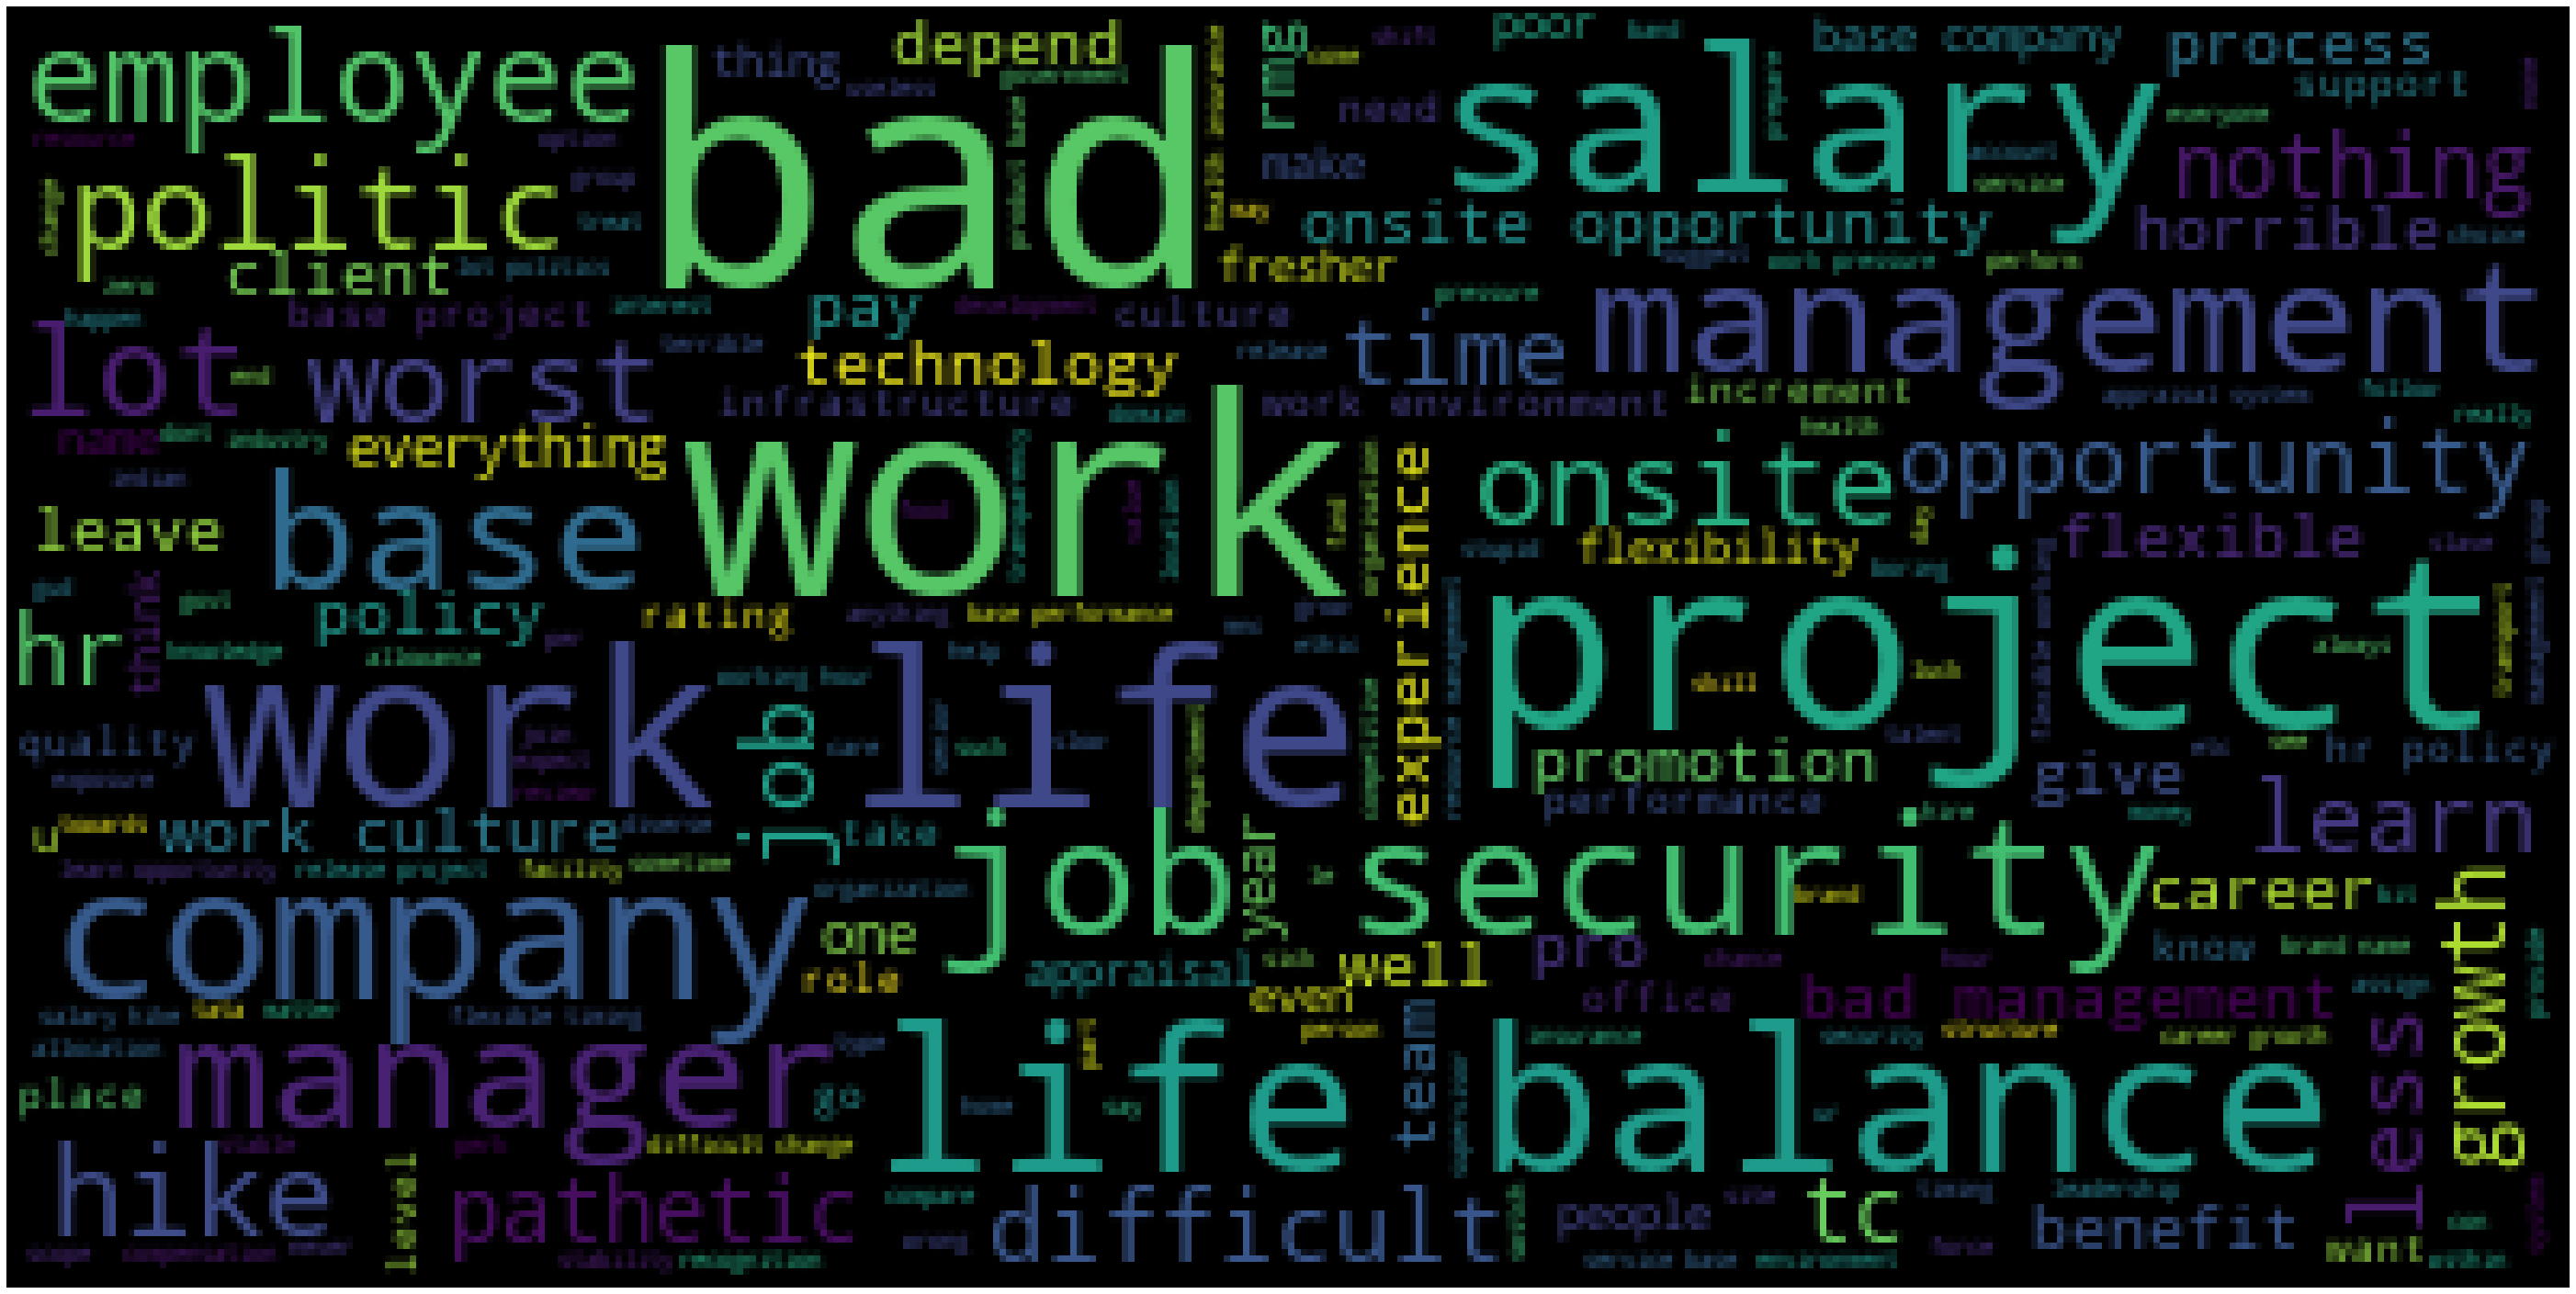

In [32]:
wc(comm['reviewText'][comm.polarity<-0.4],'black','Common Words' )

<AxesSubplot:>

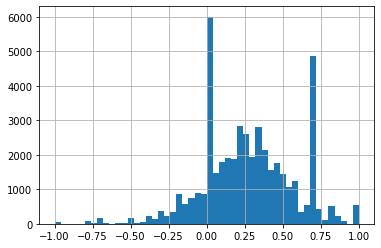

In [33]:
comm.polarity.hist(bins=50)

In [87]:
#Converting the polarity values from continuous to categorical
comm['polarity'][comm.polarity >= 0]= 1
comm['polarity'][comm.polarity < 0]= -1

-1.0    34999
 1.0    11133
Name: polarity, dtype: int64

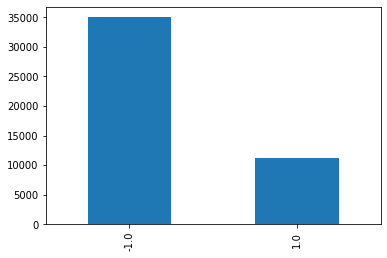

In [38]:
comm.polarity.value_counts().plot.bar()
comm.polarity.value_counts()

In [39]:
#Displaying highly negative reviews
comm[['reviewHeadLine','rating','polarity','subjectivity','author','length']][comm.polarity-comm.rating >.25]

,reviewHeadLine,rating,polarity,subjectivity,author,length
4,"""Great Place to work""",0.38,1.0,0.5,unknown,61
9,"""Good workplace""",0.65,1.0,0.6,"Gurgaon, Haryana",69
14,"""Good""",0.73,1.0,0.6,Chennai,93
16,"""Great corporate experience""",0.00,1.0,0.6,unknown,116
18,"""Great Company to Work With.""",0.42,1.0,0.6,Hyderabad,132
...,...,...,...,...,...,...
46056,"""Great place for senior people. Not so much for freshers to learn much.""",0.15,1.0,1.0,Chennai,104
46062,"""Good company""",0.44,1.0,0.6,New Delhi,52
46063,"""Very good""",0.71,1.0,0.6,unknown,134
46065,"""Overall the job experience is good.""",0.40,1.0,0.8,Calcutta,107


In [88]:
comm.isnull().sum()

reviewHeadLine        0
reviewText            0
author            16698
jobTitle           4705
length                0
polarity              0
subjectivity          0
dtype: int64

In [89]:
comm[comm['jobTitle'].isnull()==True]

,reviewHeadLine,reviewText,author,jobTitle,length,polarity,subjectivity
4498,"""Great company to work""",good place work employ friendly policy implement currently con,NaN,NaN,89,1.0,0.500000
4831,"""Javascript developer""",work client kind javascript development scope learn good management clientless increment politics know subject people feel like expert,NaN,NaN,216,1.0,0.611111
4855,"""Software Engineer""",good policy good infrastructurebad project distribution politics,NaN,NaN,72,1.0,0.600000
5183,"""TCS Vodafone - Professionalism gone for a toss""",1 good someone want work support maintenance project 2 really complex project build decade half good learn perspective 3 get pay every month1 outdated technology stack 2 project maintenance project hardly development 3 narcissist approach towards individual aspiration 4 zero professionalism 5 ze...,NaN,NaN,727,-1.0,0.573512
5222,"""Good company to work for experienced""",work pressure less good female associate onsite opportunity high experienced god transportation facilityhike moderate training mark fresher,NaN,NaN,178,1.0,0.495556
...,...,...,...,...,...,...,...
46081,"""Review""",job stability large extent opportunity expand horizontally vertically abundant opportunites travel across world excite assignmentstoo much work load balance personal official life technical skill recognize enough company full manager doer,"New York, NY",NaN,303,1.0,0.432653
46084,"""Tata Consultancy Services Review""",excellent train program entry level software engineer support continuous professional development employee take sabbatical pursue graduate degree difficult move across service practice area level performance feedback get depend entirely manager,NaN,NaN,299,1.0,0.681250
46087,"""experience with TCS""",great place get experience various fortune company team base work culture help available need difficult stand company k employee employee number billing mater,NaN,NaN,247,-1.0,0.730000
46092,"""TCS is not a place for long term job""",understand internals outsource begin career also good place know indian company business company attractive slogan vision mission value never get deploy branch work care share suppose actually joke think good employer always encourage employee contribute award employee return award never apprais...,"Hangzhou, Zhejiang",NaN,623,1.0,0.626667


In [90]:
comm[comm['author'].isnull()==True]

,reviewHeadLine,reviewText,author,jobTitle,length,polarity,subjectivity
3,"""Very good""",job security work life balancenot negative,NaN,Current Employee - Systems Engineer,57,-1.0,0.400000
4,"""Great Place to work""",many opportunity learnnothing,NaN,Current Employee - Systems Engineer,61,1.0,0.500000
8,"""Tcs""",onsite work life balance campuslow salary politics promotion delay,NaN,Former Employee - Anonymous Employee,71,1.0,0.000000
10,"""Good company""",good salary nice work environment high pressure complete work,NaN,Current Employee - Project Manager,72,1.0,0.635000
12,"""Work Life balance""",good work life balance onsite opportunity health benefitsslow salary growth promotion,NaN,Former Employee - Anonymous Employee,96,1.0,0.600000
...,...,...,...,...,...,...,...
46091,"""nice to have""",onsite opportunity compare companiestoo much heirarchy least scope promotion growth salary low industry,NaN,Engagement Manager,149,-1.0,0.300000
46096,"""It's OK OK""",never fire tata group company policy job guarantee never fire people even tough economic time unless company go sink tata brand value good company society value even apart profit engage intitiatives say social responsibility initial stage get oppurtunties work outside india monetary wise benefic...,NaN,Assistant Systems Engineer,1404,1.0,0.509127
46108,"""Great place to begin your career, but get out before you lose yourself""",good place start useful springboard employee much respect tcs low cost player,NaN,Assistant Systems Engineer,112,1.0,0.275000
46110,"""TCS' New ISU structure a disaster""",onsite opportunity trainee diverse skillsets domains good people upto yrs experiencetcs recent restructuring show call tamil consultancy service isu head south indian read tamilian chennai affiliation leave folk mumbai delhi kolkata wayside new management drunk newfound power wield way anyone al...,NaN,Project Manager,924,1.0,0.425076


In [91]:
comm['jobTitle'].fillna('unknown', inplace=True)
comm['author'].fillna('unknown', inplace=True)

In [92]:
comm['author'].drop_duplicates()

0                          Bangalore
2                             Mumbai
3                            unknown
7                          Hyderabad
9                   Gurgaon, Haryana
                    ...             
45807                   San Jose, NM
45873    BrasÃ­lia, Federal District
45988                Lake Dallas, TX
46002                   Minneota, MN
46013                        MÄlÄd
Name: author, Length: 798, dtype: object

In [45]:
comm["polarity"].mean()

-0.5173415416630538

In [46]:
comm["subjectivity"].mean()

0.46988890870883154

In [47]:
comm["polarity"].mean()

-0.5173415416630538

In [93]:
# Adding a new feature for sentiment polarity
sentiment = {-1: 'NEGATIVE',
             1: 'POSITIVE'}

comm['sentiment'] = comm['polarity'].map(sentiment)

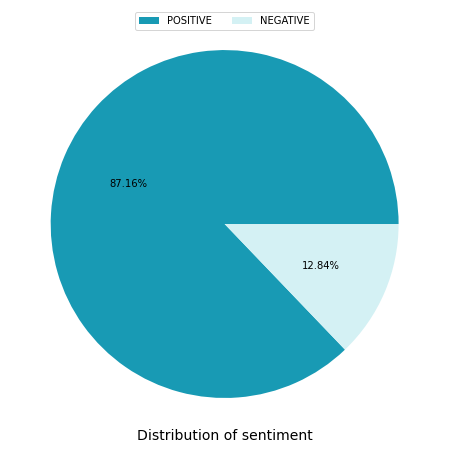

In [94]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(comm['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

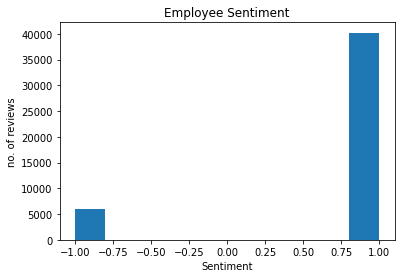

In [95]:
# Finaly, we can take a look at the distribution of reviews with sentiment across the dataset:


fig,ax = plt.subplots(1,1)
ax.hist(comm['polarity'])
ax.set_title("Employee Sentiment")
ax.set_xlabel('Sentiment')
ax.set_ylabel('no. of reviews')
plt.show()

In [51]:
comm.groupby('polarity').size().sort_values(ascending=False)

polarity
-1.0    34999
 1.0    11133
dtype: int64

In [96]:

comm.groupby('author').size().sort_values(ascending=False).head()

author
unknown      16698
Bangalore     4877
Mumbai        4326
Chennai       3990
Hyderabad     2878
dtype: int64

In [97]:
comm.groupby('jobTitle').size().sort_values(ascending=False).head()

jobTitle
Current Employee - Anonymous Employee    7848
unknown                                  4705
Former Employee - Anonymous Employee     3715
Current Employee - Systems Engineer      3416
Former Employee - Systems Engineer       2002
dtype: int64

In [55]:
comm.polarity

0       -1.0
1       -1.0
2        1.0
3       -1.0
4        1.0
        ... 
46127   -1.0
46128    1.0
46129   -1.0
46130   -1.0
46131    1.0
Name: polarity, Length: 46132, dtype: float64

In [56]:
# Vectorizing review  text 

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, 
                        min_df=5, 
                        norm='l2', 
                        encoding='latin-1', 
                        ngram_range=(1, 2), 
                        stop_words='english')
X = tfidf.fit_transform(comm.reviewText).toarray()
y = comm.polarity

In [58]:
y

0       -1.0
1       -1.0
2        1.0
3       -1.0
4        1.0
        ... 
46127   -1.0
46128    1.0
46129   -1.0
46130   -1.0
46131    1.0
Name: polarity, Length: 46132, dtype: float64

In [59]:

# Preparing training & testing data 

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size =0.80, random_state=8)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection  import cross_val_score

models = []
def classification_Models(xtrain,xtest, ytrain, ytest ):
    

    
    models.append( ('LR',  LogisticRegression()) )
    #models.append( ('CART',DecisionTreeClassifier()) )
    #models.append( ('KNN', KNeighborsClassifier()) )
    #models.append( ('NB',  GaussianNB()) )
    #models.append( ('LDA',  LinearDiscriminantAnalysis()) )zz
    models.append( ('SVM',  SVC()) )

    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, xtrain, ytrain, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
  
        
classification_Models(X_train,X_test, y_train, y_test)
#LR 0.8366158800941411
#CART 0.8408274495231017
#KNN 0.7055617490400099
#SVM 0.8392587071514409

LR 0.8353564443316736
SVM 0.8392587071514409
[array([0.83680104, 0.83544715, 0.83382114]), array([0.83842653, 0.84065041, 0.83869919])]


The accuracy: 0.8409743673115483
The Classification Report:
               precision    recall  f1-score   support

        -1.0       0.84      0.97      0.90     27963
         1.0       0.82      0.44      0.57      8943

    accuracy                           0.84     36906
   macro avg       0.83      0.70      0.74     36906
weighted avg       0.84      0.84      0.82     36906

The Confusion Matrix:
 [[27124   839]
 [ 5030  3913]]


Text(0.5, 1.0, 'Confusion Matrix')

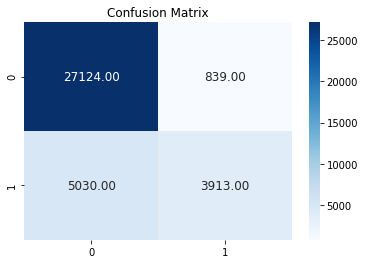

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model=LogisticRegression()
trainedmodel = model.fit(X_train,y_train)
    
# prediction
ypredict = trainedmodel.predict(X_test)

acc = accuracy_score(y_test,ypredict)
classreport = classification_report(y_test,ypredict)
confMat = confusion_matrix(y_test,ypredict)


print('The accuracy: {}'.format(acc))
print('The Classification Report:\n {}'.format(classreport))
print('The Confusion Matrix:\n {}'.format(confMat))

sns.heatmap(confMat, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='Blues').set_title('Confusion Matrix') 